In [1]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

In [43]:
Arxiv_APIWrapper= ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=250)
Wikipedia_APIWrapper= WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=250)
arxiv_tool= ArxivQueryRun(api_wrapper=Arxiv_APIWrapper, description="query arxiv papers")
wikipedia_tool= WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper)

AttributeError: get

In [ ]:
arxiv_tool.invoke("flow matching")

'Published: 2024-12-17\nTitle: Exploring Diffusion and Flow Matching Under Generator Matching\nAuthors: Zeeshan Patel, James DeLoye, Lance Mathias\nSummary: In this paper, we present a comprehensive theoretical comparison of diffusion\nand flow matching u'

In [44]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [45]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [46]:
tavily=TavilySearchResults()

In [47]:
tools=[arxiv_tool,wikipedia_tool,tavily]

In [48]:
from langchain_groq import ChatGroq

In [49]:
llm = ChatGroq( model_name="llama3-8b-8192")


In [50]:
llm_wt=llm.bind_tools(tools=tools)

In [51]:
llm_wt.invoke("dollar to rupee")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ragk5k313', 'function': {'arguments': '{"query":"current exchange rate dollar to rupee"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 1162, 'total_tokens': 1238, 'completion_time': 0.056534419, 'prompt_time': 0.42973864, 'queue_time': 0.264664713, 'total_time': 0.486273059}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_5b339000ab', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3bad7d84-7849-4e87-9737-d30a0dc021a6-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current exchange rate dollar to rupee'}, 'id': 'ragk5k313', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1162, 'output_tokens': 76, 'total_tokens': 1238})

In [52]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:

class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]


In [54]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [55]:
def tool_calling_llm(state:State):
    return {"messages":[llm_wt.invoke(state["messages"])]}

In [56]:
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))





In [57]:
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition)

In [62]:
builder.add_edge("tools","tool_calling_llm")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [63]:
graph_builder=builder.compile()

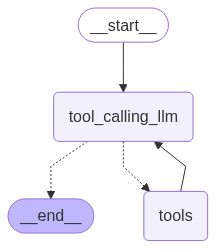

In [64]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [65]:
graph_builder.invoke({"messages": [{"role": "user", "content": "attention"}]})

{'messages': [HumanMessage(content='attention', additional_kwargs={}, response_metadata={}, id='6c6ea339-5914-4d93-9e09-e5593e47cd32'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'y3hs317s3', 'function': {'arguments': '{"query":"attention"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 1158, 'total_tokens': 1224, 'completion_time': 0.049494178, 'prompt_time': 0.127136426, 'queue_time': 0.267951846, 'total_time': 0.176630604}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_5b339000ab', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2bf5734d-204f-49e6-a312-c3ed05d28a43-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'attention'}, 'id': 'y3hs317s3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1158, 'output_tokens': 66, 'total_tokens': 1224}),
  ToolMessage(content='Page: Attention\nSummary: Attention or focus, is the concentration of awareness on so